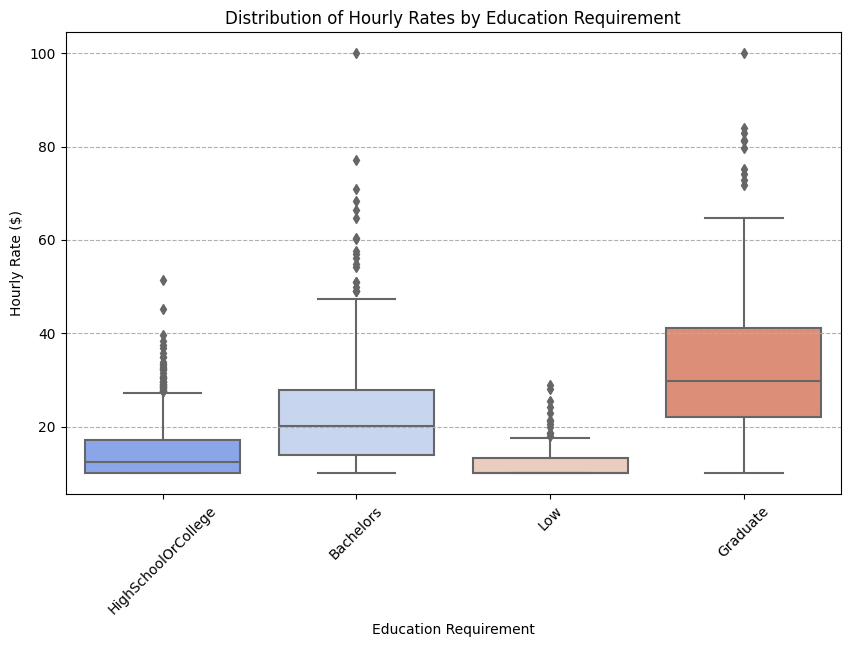

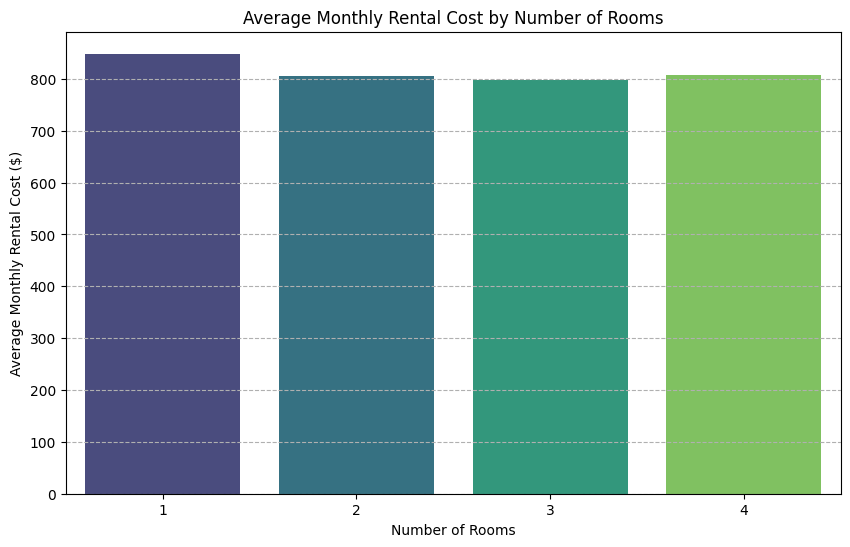

<Figure size 1400x800 with 0 Axes>

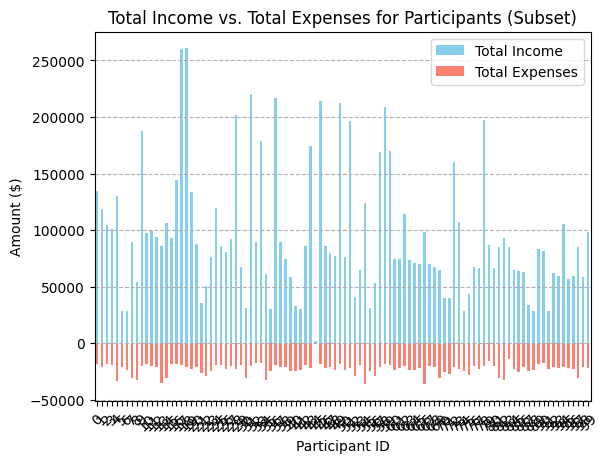

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the datasets
jobs_df = pd.read_csv('Attributes/Jobs.csv')
participants_df = pd.read_csv('Attributes/Participants.csv')
apartments_df = pd.read_csv('Attributes/Apartments.csv')
financial_journal_df = pd.read_csv('Journals/FinancialJournal.csv')

# Function to calculate working hours per day
def calculate_daily_working_hours(start, end):
    start_time = datetime.strptime(start, "%I:%M:%S %p")
    end_time = datetime.strptime(end, "%I:%M:%S %p")
    working_hours = (end_time - start_time).seconds / 3600  # Convert seconds to hours
    return working_hours

# Assuming 20 working days per month for the calculation
working_days_per_month = 20

# Calculate daily working hours for each job and then monthly income
jobs_df['DailyWorkingHours'] = jobs_df.apply(lambda row: calculate_daily_working_hours(row['startTime'], row['endTime']), axis=1)
jobs_df['MonthlyIncome'] = jobs_df['hourlyRate'] * jobs_df['DailyWorkingHours'] * working_days_per_month

# Visualization 1: Distribution of Hourly Rates Across Different Education Requirements
plt.figure(figsize=(10, 6))
sns.boxplot(x='educationRequirement', y='hourlyRate', data=jobs_df, palette='coolwarm')
plt.title('Distribution of Hourly Rates by Education Requirement')
plt.ylabel('Hourly Rate ($)')
plt.xlabel('Education Requirement')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

# Visualization 2: Average Monthly Rental Cost by Number of Rooms
average_rent_by_rooms = apartments_df.groupby('numberOfRooms')['rentalCost'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='numberOfRooms', y='rentalCost', data=average_rent_by_rooms, palette='viridis')
plt.title('Average Monthly Rental Cost by Number of Rooms')
plt.ylabel('Average Monthly Rental Cost ($)')
plt.xlabel('Number of Rooms')
plt.grid(axis='y', linestyle='--')
plt.show()

# Visualization 3: Monthly Income vs. Expenses
income_expense_summary = financial_journal_df.groupby(['participantId', 'category'])['amount'].sum().unstack(fill_value=0)
income_expense_summary['TotalIncome'] = income_expense_summary['Wage']
income_expense_summary['TotalExpenses'] = income_expense_summary[['Education', 'Food', 'Shelter', 'Recreation']].sum(axis=1)
income_expense_summary['NetIncome'] = income_expense_summary['TotalIncome'] - income_expense_summary['TotalExpenses']

# Plot Total Income vs. Total Expenses for a subset of participants
participants_subset = income_expense_summary.head(100)  # Simplification for visualization purposes
plt.figure(figsize=(14, 8))
participants_subset[['TotalIncome', 'TotalExpenses']].plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Total Income vs. Total Expenses for Participants (Subset)')
plt.ylabel('Amount ($)')
plt.xlabel('Participant ID')
plt.legend(['Total Income', 'Total Expenses'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


/var/folders/tk/57r3fhb13vs_58bv5_ry07_r0000gn/T/ipykernel_91236/1169640130.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  job_counts_pivot = job_counts.pivot("educationRequirement", "Count", "Count")


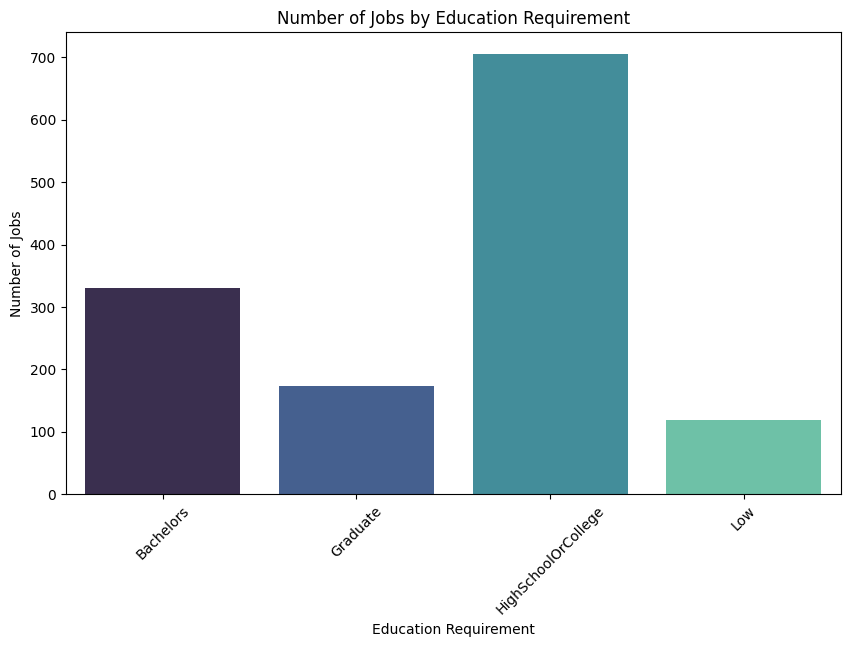

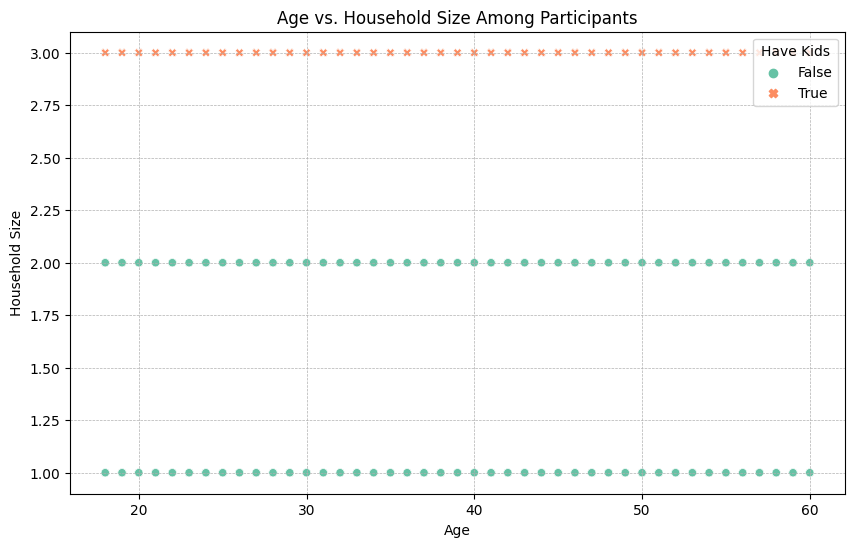

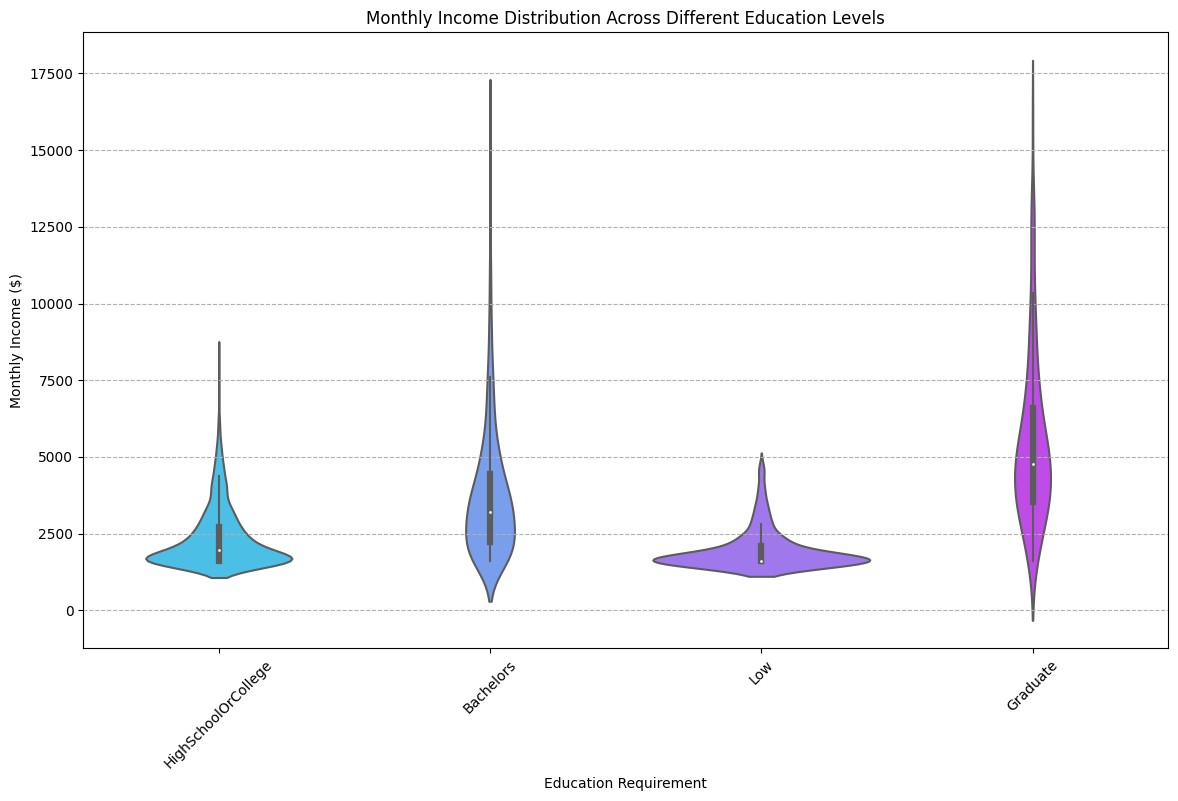

In [2]:


# Visualization 4: Heatmap of Job Availability vs. Education Requirement
# Count the number of jobs available for each education requirement
job_counts = jobs_df.groupby('educationRequirement').size().reset_index(name='Count')
job_counts_pivot = job_counts.pivot("educationRequirement", "Count", "Count")


plt.figure(figsize=(10, 6))
sns.barplot(x='educationRequirement', y='Count', data=job_counts, palette='mako')
plt.title('Number of Jobs by Education Requirement')
plt.ylabel('Number of Jobs')
plt.xlabel('Education Requirement')
plt.xticks(rotation=45)
plt.show()

# Visualization 5: Distribution of Participants' Age and Household Size
# Creating a scatter plot to show the relationship between age and household size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='householdSize', data=participants_df, hue='haveKids', palette='Set2', style='haveKids')
plt.title('Age vs. Household Size Among Participants')
plt.xlabel('Age')
plt.ylabel('Household Size')
plt.legend(title='Have Kids')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Visualization 6: Monthly Income Distribution Across Different Jobs
plt.figure(figsize=(14, 8))
sns.violinplot(x="educationRequirement", y="MonthlyIncome", data=jobs_df, palette="cool", split=True)
plt.title('Monthly Income Distribution Across Different Education Levels')
plt.xlabel('Education Requirement')
plt.ylabel('Monthly Income ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


/var/folders/tk/57r3fhb13vs_58bv5_ry07_r0000gn/T/ipykernel_91236/1999019594.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  financial_health_over_time['month'] = financial_health_over_time['timestamp'].dt.to_period('M')


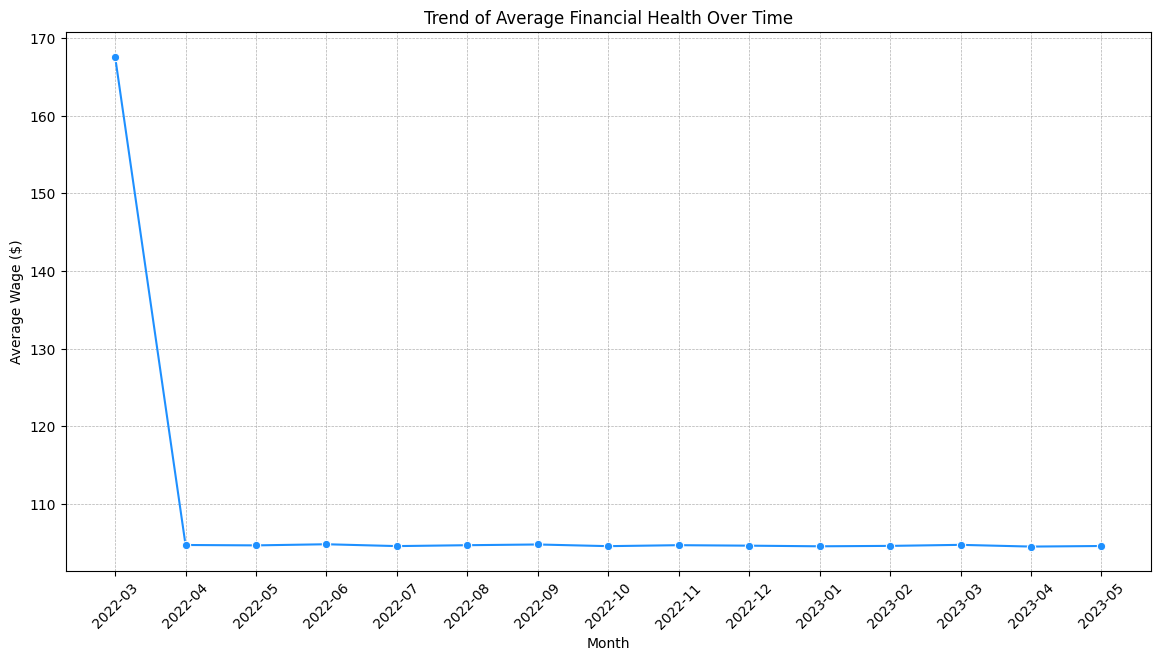

In [3]:
# Visualization 7: Trend of Average Available Balance Over Time
financial_journal_df['timestamp'] = pd.to_datetime(financial_journal_df['timestamp'])
financial_health_over_time = financial_journal_df[financial_journal_df['category'] == 'Wage'].copy()

# Group by month and calculate average wage as a proxy for financial health
financial_health_over_time['month'] = financial_health_over_time['timestamp'].dt.to_period('M')
monthly_financial_health = financial_health_over_time.groupby('month')['amount'].mean().reset_index()
monthly_financial_health['month'] = monthly_financial_health['month'].astype(str)  # Convert to string for plotting

plt.figure(figsize=(14, 7))
sns.lineplot(x='month', y='amount', data=monthly_financial_health, marker='o', color='dodgerblue')
plt.title('Trend of Average Financial Health Over Time')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Average Wage ($)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()



/var/folders/tk/57r3fhb13vs_58bv5_ry07_r0000gn/T/ipykernel_91236/2256794274.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(jobs_df['MonthlyIncome'].dropna(), shade=True, color="r", alpha=0.7, bw_adjust=0.5)


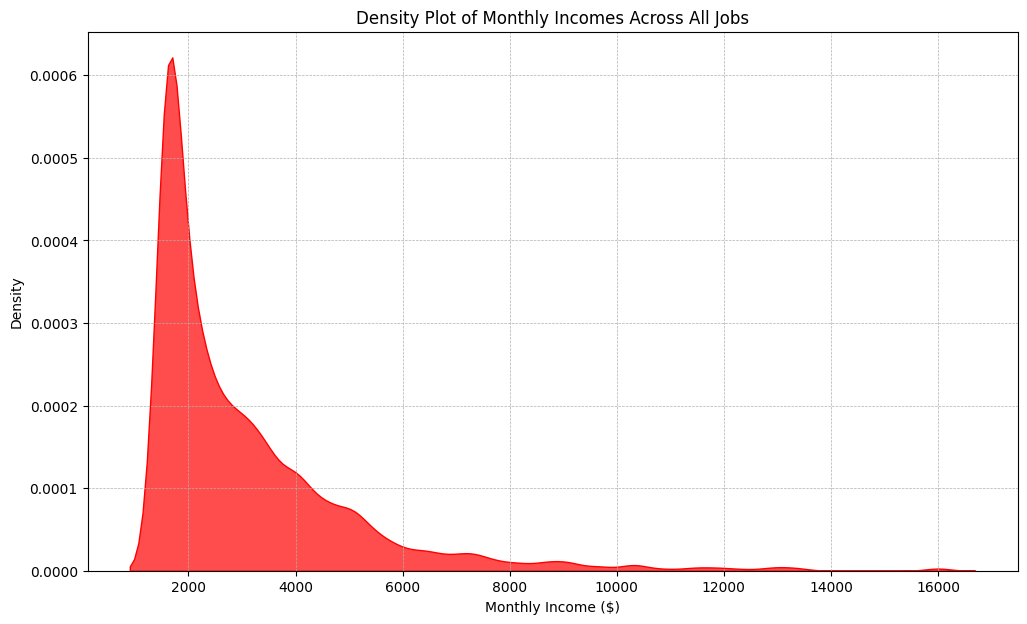

In [5]:
jobs_df['MonthlyIncome'] = pd.to_numeric(jobs_df['MonthlyIncome'], errors='coerce')

plt.figure(figsize=(12, 7))
sns.kdeplot(jobs_df['MonthlyIncome'].dropna(), shade=True, color="r", alpha=0.7, bw_adjust=0.5)
plt.title('Density Plot of Monthly Incomes Across All Jobs')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Density')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
